# Granger

> Fill in a module description here

In [ ]:
#| default_exp granger

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
# NOTE: needed for python 3.10 forward compatibility with scanpy as 
# scanpy uses Iterable which is deprecated in 3.10
import collections.abc
#hyper needs the four following aliases to be done manually.
collections.Iterable = collections.abc.Iterable
collections.Mapping = collections.abc.Mapping
collections.MutableSet = collections.abc.MutableSet
collections.MutableMapping = collections.abc.MutableMapping

In [ ]:
#| export

In [5]:
a = np.random.randint(0, 10, (10, 100))

In [12]:

np.sort(a)


array([[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7,
        7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8,
        8, 8, 8, 8, 9,

In [17]:
import pandas as pd, numpy as np
from sklearn.preprocessing import StandardScaler
import importlib, matplotlib as mpl, matplotlib.pyplot as plt, seaborn as sns
# importlib.reload(mpl); importlib.reload(plt); importlib.reload(sns)

genes = 'wasf colq gpr1 chrm3 lmod2 tek kank3 oca2 taz map4k1'.split()
df_trj = pd.DataFrame(
    [
        np.sort(np.random.randint(0, 10, (100)))[::-1] if i % 2 == 0 else np.sort(np.random.randint(0, 10, (100)))
        for i in range(len(genes))
    ], index=genes
)
df_trj

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
wasf,9,9,9,9,9,9,9,9,9,9,...,0,0,0,0,0,0,0,0,0,0
colq,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,9,9,9,9,9,9
gpr1,9,9,9,9,9,9,9,9,9,9,...,1,1,1,1,0,0,0,0,0,0
chrm3,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
lmod2,9,9,9,9,9,9,9,9,9,9,...,0,0,0,0,0,0,0,0,0,0
tek,0,0,0,0,0,0,0,0,1,1,...,9,9,9,9,9,9,9,9,9,9
kank3,9,9,9,9,9,9,9,9,9,8,...,0,0,0,0,0,0,0,0,0,0
oca2,0,0,0,0,0,0,0,1,1,1,...,9,9,9,9,9,9,9,9,9,9
taz,9,9,9,9,9,9,9,9,8,8,...,1,1,0,0,0,0,0,0,0,0
map4k1,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9


In [18]:
df_trj_s = pd.DataFrame(StandardScaler().fit_transform(df_trj.T)).T
df_trj_s.index = df_trj.index
df_trj_s

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
wasf,1.520723,1.520723,1.520723,1.520723,1.520723,1.520723,1.520723,1.520723,1.520723,1.520723,...,-1.604051,-1.604051,-1.604051,-1.604051,-1.604051,-1.604051,-1.604051,-1.604051,-1.604051,-1.604051
colq,-1.579356,-1.579356,-1.579356,-1.579356,-1.579356,-1.579356,-1.579356,-1.579356,-1.579356,-1.579356,...,1.517421,1.517421,1.517421,1.517421,1.904518,1.904518,1.904518,1.904518,1.904518,1.904518
gpr1,1.539910,1.539910,1.539910,1.539910,1.539910,1.539910,1.539910,1.539910,1.539910,1.539910,...,-1.222260,-1.222260,-1.222260,-1.222260,-1.567532,-1.567532,-1.567532,-1.567532,-1.567532,-1.567532
chrm3,-1.486019,-1.486019,-1.486019,-1.486019,-1.486019,-1.486019,-1.486019,-1.486019,-1.486019,-1.486019,...,1.519413,1.519413,1.519413,1.519413,1.519413,1.519413,1.519413,1.519413,1.519413,1.519413
lmod2,1.498835,1.498835,1.498835,1.498835,1.498835,1.498835,1.498835,1.498835,1.498835,1.498835,...,-1.609348,-1.609348,-1.609348,-1.609348,-1.609348,-1.609348,-1.609348,-1.609348,-1.609348,-1.609348
tek,-1.614366,-1.614366,-1.614366,-1.614366,-1.614366,-1.614366,-1.614366,-1.614366,-1.255618,-1.255618,...,1.614366,1.614366,1.614366,1.614366,1.614366,1.614366,1.614366,1.614366,1.614366,1.614366
kank3,1.662145,1.662145,1.662145,1.662145,1.662145,1.662145,1.662145,1.662145,1.662145,1.311482,...,-1.493827,-1.493827,-1.493827,-1.493827,-1.493827,-1.493827,-1.493827,-1.493827,-1.493827,-1.493827
oca2,-1.693275,-1.693275,-1.693275,-1.693275,-1.693275,-1.693275,-1.693275,-1.337545,-1.337545,-1.337545,...,1.508295,1.508295,1.508295,1.508295,1.508295,1.508295,1.508295,1.508295,1.508295,1.508295
taz,1.560937,1.560937,1.560937,1.560937,1.560937,1.560937,1.560937,1.560937,1.206983,1.206983,...,-1.270695,-1.270695,-1.624649,-1.624649,-1.624649,-1.624649,-1.624649,-1.624649,-1.624649,-1.624649
map4k1,-1.561385,-1.561385,-1.561385,-1.561385,-1.561385,-1.561385,-1.561385,-1.561385,-1.561385,-1.561385,...,1.473705,1.473705,1.473705,1.473705,1.473705,1.473705,1.473705,1.473705,1.473705,1.473705


<Figure size 1200x800 with 0 Axes>

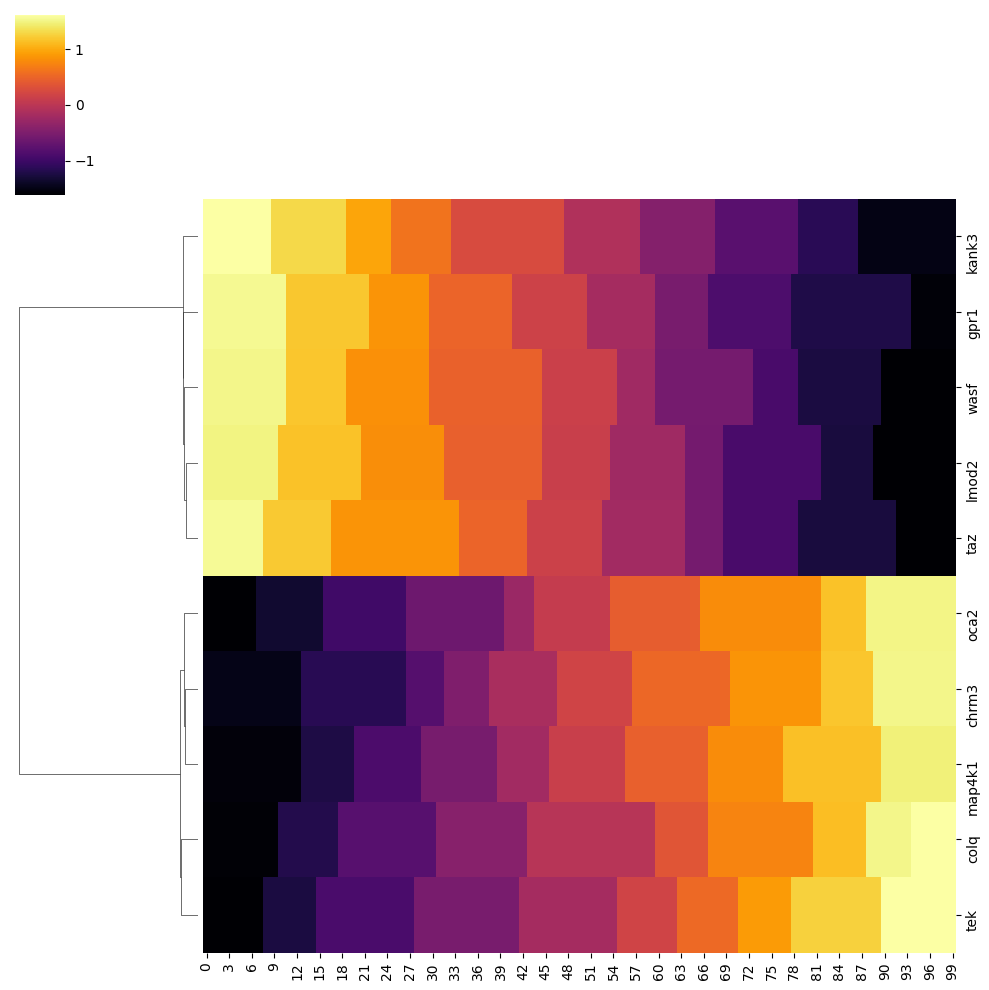

In [19]:
fig = plt.figure(figsize=(12, 8))
ax = sns.clustermap(
    df_trj_s, cmap="inferno", robust=True,
    col_cluster=False,  yticklabels=True
)

In [22]:
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import grangercausalitytests
from joblib import Parallel, delayed

def kpss_test(series, print=False, **kwargs):
    # KPSS Null hypothesis: there is a no unit root, meaning series is stationary
    statistic, p_value, n_lags, critical_values = kpss(series, **kwargs)

    # Format Output    
    result_str = ''
    result_str += f'KPSS Statistic: {statistic}\n'
    result_str += f'p-value: {p_value}\n'
    result_str += f'num lags: {n_lags}\n'
    result_str += f'Critial Values:\n'    
    for key, value in critical_values.items():
        result_str += f'\t{key}:{value}\n'
    result_str += f'Result: The series is {"not " if p_value < 0.05 else ""}stationary'

    if print:
        print(result_str)

    return

def add_suffix(arr, suffix:str):
    return list(map(lambda e: f'{e}_{suffix}', arr))

def _prep_args_for_granger_causality_tests(
    test:str='ssr_chi2test', 
    lag_order:int=1,
    max_lag:tuple=None,  
):
    if test is None:
        test = 'ssr_chi2test'

    if lag_order is None:
        lag_order = 1

    if max_lag is None:
        max_lag = (lag_order,)
    
    return test, lag_order, max_lag
    
def get_pval_from_granger_causality_tests(
    data,
    test:str='ssr_chi2test', 
    lag_order:int=1,
    max_lag:tuple=None, 
):
    test, lag_order, max_lag = _prep_args_for_granger_causality_tests(test, lag_order, max_lag)
    test_result = grangercausalitytests(data, maxlag=max_lag, verbose=False)
    p_values = [test_result[i][0][test][1] for i in max_lag]
    min_p_value = np.min(p_values)
    return min_p_value

def grangers_causation_matrix(
    data, 
    x_vars, 
    y_vars, 
    test:str='ssr_chi2test', 
    lag_order:int=1,
    max_lag:tuple=None,    
    n_jobs:int=36
):
    
    test, lag_order, max_lag = _prep_args_for_granger_causality_tests(test, lag_order, max_lag)

    delayed_funcs = [
        delayed(get_pval_from_granger_causality_tests)(
            data[[x_var, y_var]], test, lag_order, max_lag
        ) for y_var in y_vars for x_var in x_vars
    ]

    parallel_out = Parallel(n_jobs=n_jobs)(delayed_funcs)
    df_res = pd.DataFrame(
        np.array(parallel_out).reshape((len(x_vars), len(y_vars))),
        index=x_vars, columns=y_vars,        
    )
    df_res.index = add_suffix(x_vars, 'x')
    df_res.columns = add_suffix(y_vars, 'y')
    return df_res


def shift_trajectories(
    df:pd.DataFrame,
    shift:int=10,
):
    df_trj = df.copy()
    df_trj = df_trj.T[::shift]
    df_trj = df_trj - df_trj.shift(1)
    df_trj = df_trj.dropna()
    return df_trj

def calculate_granger_causation(
    df:pd.DataFrame,    
    x_vars=None, 
    y_vars=None,
    shift:int=10,
    test:str='ssr_chi2test', 
    lag_order:int=1,
    max_lag:tuple=None,    
    n_jobs:int=36
):     
    if x_vars is None:
        x_vars = df.index.values

    if y_vars is None:
        y_vars = df.index.values

    df_trj = shift_trajectories(df, shift)

    test, lag_order, max_lag = _prep_args_for_granger_causality_tests(test, lag_order, max_lag)    
    df_res = grangers_causation_matrix(
        df_trj, x_vars=x_vars, y_vars=y_vars,
        test=test, lag_order=lag_order, max_lag=max_lag,
        n_jobs=n_jobs
    )
    return df_res

def apply_log2_fold(df_granger:pd.DataFrame):
    return -np.log2(df_granger + (2 ** -20))    

def apply_signed_correlation(df_tseries:pd.DataFrame, df_granger:pd.DataFrame):
    _stability = 1e-8
    var_names = df_tseries.index.values
    signed = -np.sign(df_tseries.T.corr()) * np.log(df_granger.values + _stability)
    df_res = pd.DataFrame(signed, index=var_names, columns=var_names)
    return df_res

In [26]:
res = calculate_granger_causation(df_trj_s+np.random.randn(*df_trj_s.shape), n_jobs=2)

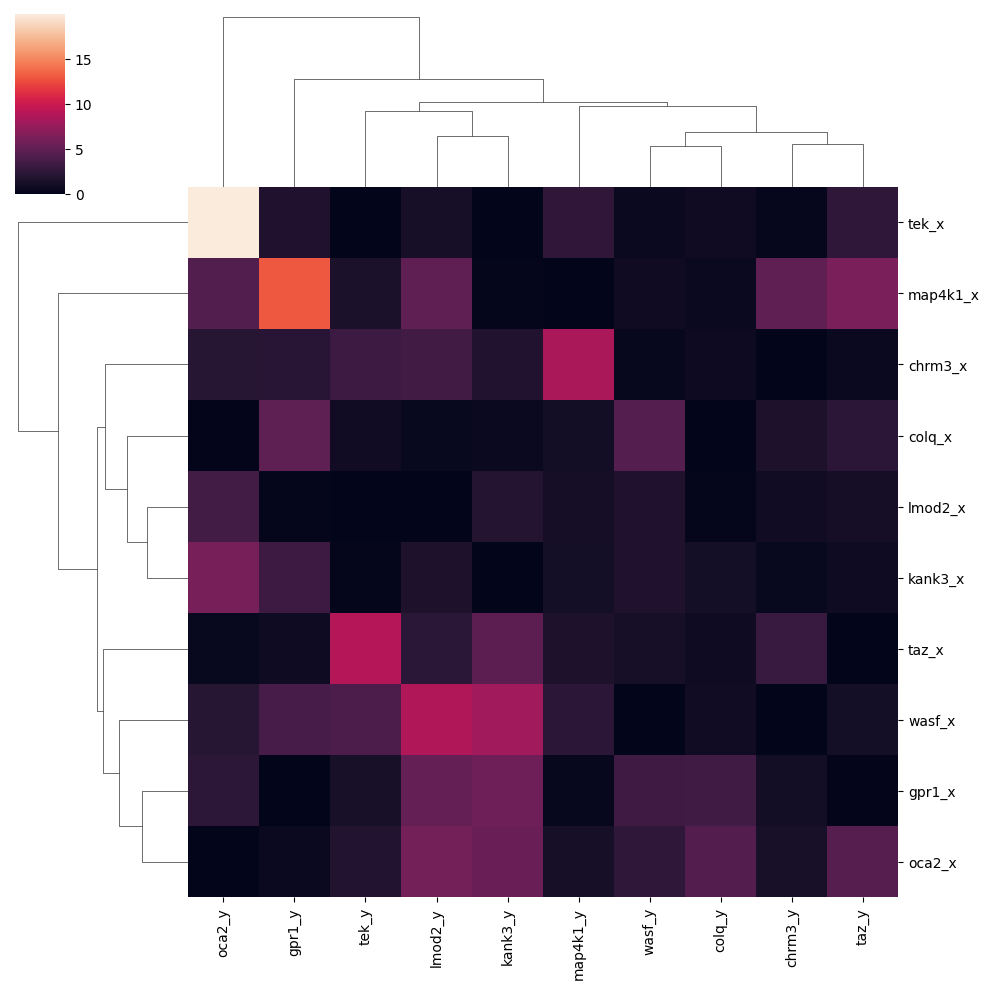

In [28]:
ax = sns.clustermap(
    apply_log2_fold(res)
)

In [ ]:



def grangers_causation_matrix(
    df:pd.DataFrame, 
    test:str='ssr_chi2test', 
    lag_order:int=1,
    max_lag:tuple=None,
    verbose:bool=False
):
    '''
    Check Granger Causality of all possible combinations of the Time series.

    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    Parameters
    ----------
    df      : pandas DataFrame containing the time series variables

    Notes
    -----
    lag_order
        `lag_order = 1` # becuase we got this value before. We are not suppose to add 1 to it
    max_lag
        `max_lag = (lag_order, )`
    '''    
    genes = df.index.values
    n_genes = len(genes)
    
    if lag_order is None:
        lag_order = 1

    if max_lag is None:
        max_lag = (lag_order,)

    df_res = pd.DataFrame(np.zeros((n_genes, n_genes)), columns=genes, index=genes)
    for col in df.columns:
        for idx in df.index:
            test_result = grangercausalitytests(df[[idx, col]], maxlag=max_lag, verbose=False)            
            p_values = [test_result[i][0][test][1] for i in max_lag]

            if verbose:
                print(f'Y = {idx},\tX = {col},\tP-Values = {p_values}')

            min_p_value = np.min(p_values)
            df_res.loc[idx, col] = min_p_value

    df_res.columns = [var + "_x" for var in genes]
    df_res.index = [var + "_y" for var in genes]
    return df_res

In [ ]:
lag_order = 1
maxlag = (
    lag_order,  # becuase we got this value before. We are not suppose to add 1 to it
)
test = "ssr_chi2test"


def grangers_causation_matrix(data, variables, test="ssr_chi2test", verbose=False):
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(
        np.zeros((len(variables), len(variables))), columns=variables, index=variables
    )
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(
                data[[r, c]], maxlag=maxlag, verbose=False
            )
            # print(test_result)
            p_values = [test_result[i][0][test][1] for i in maxlag]
            if verbose:
                print(f"Y = {r}, X = {c}, P Values = {p_values}")
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + "_x" for var in variables]
    df.index = [var + "_y" for var in variables]
    return df

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()